## 实验一 电力数据的线性回归分析

In [1]:
# 1.数据获取
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
data = pd.read_excel('发电场数据.xlsx')
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 2.导入线性回归模块，简称为LR
lr = LR()  # 创建线性回归模型类
lr.fit(x, y)  # 拟合
Slr = lr.score(x, y)   # 判定系数 R^2
c_x = lr.coef_        # x对应的回归系数
c_b = lr.intercept_   # 回归系数常数项

# 3.预测
R1 = lr.predict([[10.77, 40.67, 1011.8, 66.7]])  # 进行预测
print('x回归系数为：', c_x)
print('回归系数常数项为：', c_b)
print('判定系数为：', Slr)
print('样本预测值为：', R1)

# 4.关于公式
r1 = [[10.77, 40.67, 1011.8, 66.7]]*c_x
R2 = r1.sum()+c_b  # 计算其预测值
print('样本预测值为：', R2)

x回归系数为： [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
回归系数常数项为： 454.6092743153102
判定系数为： 0.9286960898122536
样本预测值为： [476.0713911]
样本预测值为： 476.07139110336226


### 实验一样本预测值为 476.07139110336226

### 实验一产生线性回归公式为 $PE=-1.97751311\times AT-0.23391642\times V+ 0.06208294\times AP-0.1580541\times RH+454.6092743153102$

## 实验二 波士顿房价的预测

训练测试集的shape： (455, 13) (51, 13) (455,) (51,)
测试集的结果： [29.3639579  36.18916482 14.05923305 24.76681233 18.79788306 23.24853399
 17.67925163 13.52689687 23.47852891 20.64157306 25.09931716 18.95745403
 -5.20884417 21.49578209 19.70582791 25.88188533 20.58810146  6.32255133
 40.53496182 17.70625559 27.18358564 30.26489811 11.44273418 23.67928093
 18.3134012  16.68382624 22.70408601 15.00807515 22.63999482 19.26595697
 23.18874623 25.13865453 25.45744382 18.65563    17.14694386 17.09774591
 30.86149933 20.30925718 23.6643961  24.16999127 14.02229608 32.76422241
 42.75995463 17.52640822 27.33820148 17.4795262  14.37833428 25.34949499
 20.51753419 30.15497476 21.71831626]


Text(0, 0.5, 'Prediction')

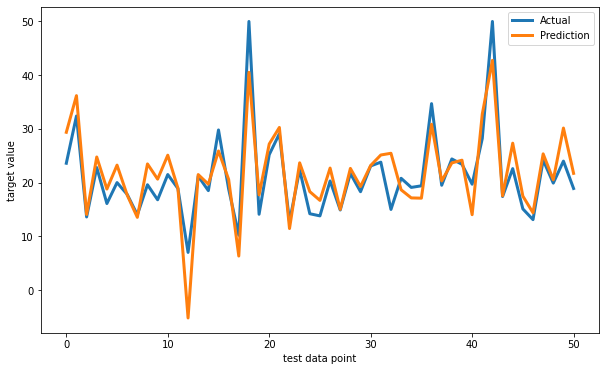

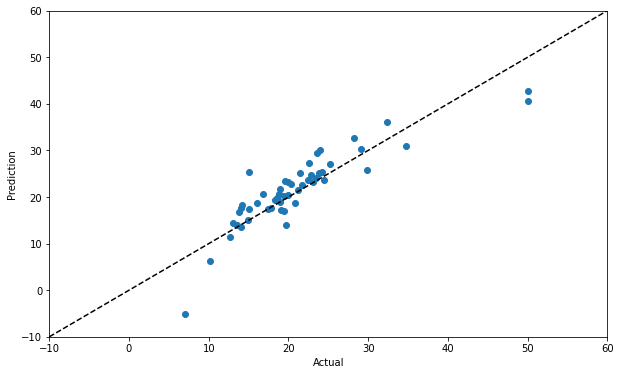

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

boston = datasets.load_boston()  # 波士顿房价数据
# 创建训练集 与 测试集
x_train, x_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.1,
                                                    random_state=42)

print('训练测试集的shape：', x_train.shape, x_test.shape,
      y_train.shape, y_test.shape)

# 训练数据
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

# 得出预测值
y_pred = linreg.predict(x_test)
print('测试集的结果：', y_pred)

# 画图
plt.figure(figsize=(10, 6))  # 设置大小

plt.plot(y_test, linewidth=3, label='Actual')
plt.plot(y_pred, linewidth=3, label='Prediction')

# 显示上面设置的名字与底部
plt.legend(loc='best')
plt.xlabel('test data point')
plt.ylabel('target value')

plt.figure(figsize=(10, 6))  # 设置大小
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('Actual')
plt.ylabel('Prediction')

## 实验三 鸾尾花数据集进行逻辑回归分析、模型评估和预测

logistic回归的权重为：
 [[-0.45928925  0.83069892 -2.26606529 -0.99743983]
 [ 0.33117319 -0.72863426 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206466  2.33447676  1.98455011]]
logistic回归的偏置为：
 [  9.43880649   3.93047365 -13.36928015]
训练集准确度为:
 0.9833333333333333
测试集准确度为:
 0.8666666666666667
the confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


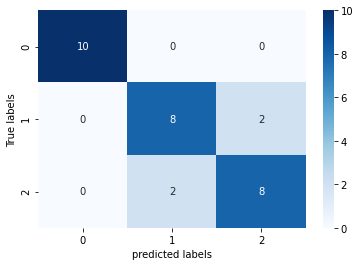

新数据属于各个类别概率： [[9.61829312e-01 3.81704742e-02 2.13625847e-07]
 [1.49634473e-03 3.13436680e-01 6.85066975e-01]]
新数据的预测分类情况： [0 2]


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
import seaborn as sns

data = datasets.load_iris()
iris_target=data.target # 得到数据对应的类标签
iris_features=pd.DataFrame(data=data.data,
                           columns=data.feature_names) 
# 利用pandas转化为DataFrame格式

x_train,x_test,y_train,y_test=train_test_split(iris_features,
                                               iris_target,
                                               test_size=0.2,
                                               random_state=2020)

# 定义逻辑回归模型
clf = LogisticRegression(random_state=0,solver='lbfgs')

# 在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)
# 查看对应的w及w0
print('logistic回归的权重为：\n',clf.coef_)
print('logistic回归的偏置为：\n',clf.intercept_)

# 在训练集和测试集上分别利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
# 预测的概率
train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)

# 利用accuracy（准确度）【预测正确样本数目站总预测样本数目的比列】评估模型效果
print('训练集准确度为:\n',metrics.accuracy_score(y_train,train_predict))
print('测试集准确度为:\n',metrics.accuracy_score(y_test,test_predict))

# 查看混淆矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('the confusion matrix result:\n',confusion_matrix_result)

# 利用热力图进行可视化
plt.figure()
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('predicted labels')
plt.ylabel('True labels')
plt.show()

# 模型应用，使用模型对如下2个样本进行预测
x_new = [[5.5, 3.3, 1.4, 0.3],
         [6.0, 3.0, 4.9, 1.9]]
print('新数据属于各个类别概率：',clf.predict_proba(x_new))
print('新数据的预测分类情况：',clf.predict(x_new))

### 训练集准确度为:0.9833333333333333 测试集准确度为:0.8666666666666667

### 模型应用 两个样本中第一个样本被分为第一类，第二个样本被分为第三类